# Importing Liabraries

In [192]:
import numpy as np   #for linear algebra
import pandas as pd  #for data processing

import matplotlib.pyplot as plt  #for visualization of the plots
import seaborn as s     #for countplots to show more details about ratings of comcast company

df = pd.read_csv('D:/ComcastComplaints.csv') #for reading the csv file of reviews and rationgs


df_fcc = pd.read_csv("D:/Comcastfcc.csv") #for reading the csv file of Federal Communications Commission

df.head()


,author,posted_on,rating,text
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...


In [193]:
print(df.shape)
df.rating.value_counts()

(5659, 4)


1    3734
0    1560
2     260
3      54
5      32
4      19
Name: rating, dtype: int64

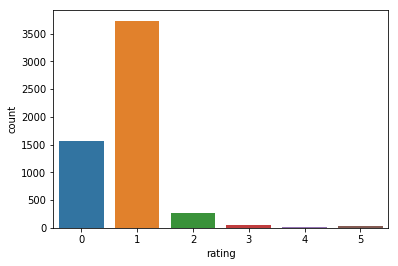

In [194]:
s.countplot(x='rating',data=df) #for plotting the count plot of ratings.

In [195]:
df.rating.value_counts()

1    3734
0    1560
2     260
3      54
5      32
4      19
Name: rating, dtype: int64

There are barely any positive reviews from the dataset; however, there are 1560 observations that have a rating of 0.  If we look at observation index number 2, we can see that the user was not allowed to give negative or no star reviews. This indicates that all 0 ratings likely indicate the user did not leave a rating. 

In [196]:
df_no_rating = df[df.rating == 0]      #Removing '0' from ratings because it means no rating.
df = df[df.rating != 0]
print(df_no_rating.shape,df.shape)


(1560, 4) (4099, 4)


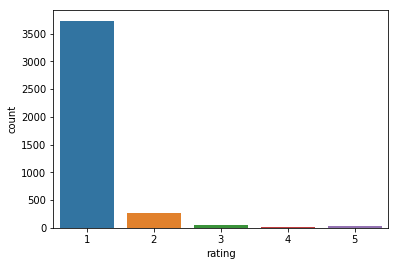

In [197]:
s.countplot(x='rating',data=df)

In [198]:
a=[]
a=df.rating      #for identifying positive and negative reviews.
Positive=0
Negative=0      
for i in a:
    if i>=3:
        Positive+=1
    else:
        Negative+=1
print(Positive)
print(Negative)
print("There were {} positive reviews and at least {} negative reviews.".format(str(Positive),str(Negative)))


105
3994
There were 105 positive reviews and at least 3994 negative reviews.


In [199]:
df['state'] = [x.upper() for x in df['author'].str[-2:]]
df.state.value_counts() #for counting the reviews from each state.


FL    650
CA    345
GA    320
IL    284
PA    221
TN    202
TX    193
MI    189
WA    168
NJ    167
MD    156
VA    146
CO    144
MA    120
IN    104
OR     83
MN     82
CT     50
AL     48
UT     47
SC     38
DE     34
NM     30
MS     30
NH     28
NY     24
DC     22
AZ     20
LA     19
KY     19
AR     17
WV     15
ER     15
MO     11
OH     10
WI      8
VT      8
ME      7
NC      5
NV      3
KS      3
IA      3
BC      2
ND      1
TA      1
HI      1
WY      1
AK      1
ON      1
ED      1
PE      1
ID      1
Name: state, dtype: int64

In [200]:
(df[df.rating > 2].state.value_counts() / df.state.value_counts()).sort_values(ascending=False) 
#for finding the percentage of satisfaction of customer.


IA    1.000000
ID    1.000000
BC    0.500000
NV    0.333333
WV    0.133333
NH    0.107143
MO    0.090909
ER    0.066667
SC    0.052632
AZ    0.050000
WA    0.047619
CT    0.040000
MN    0.036585
VA    0.034247
NM    0.033333
MI    0.031746
GA    0.031250
IN    0.028846
CO    0.027778
MD    0.025641
MA    0.025000
NJ    0.023952
PA    0.022624
FL    0.021538
UT    0.021277
IL    0.021127
AL    0.020833
CA    0.017391
OR    0.012048
TX    0.005181
TN    0.004950
AK         NaN
AR         NaN
DC         NaN
DE         NaN
ED         NaN
HI         NaN
KS         NaN
KY         NaN
LA         NaN
ME         NaN
MS         NaN
NC         NaN
ND         NaN
NY         NaN
OH         NaN
ON         NaN
PE         NaN
TA         NaN
VT         NaN
WI         NaN
WY         NaN
Name: state, dtype: float64

Out of the states with more than 10 observations, WV and NH have the highest customer satisfaction percentage. Each state has 15 and 28 ratings where information was available respectively.

# Importing WordCloud for showing a cloud of complaints

In [201]:
from wordcloud import WordCloud, STOPWORDS

list_stops = ('comcast','time','customer','even','now','company',
            'day','someone','thing','also','got','way','call','called','one','said','tell','service')

for word in list_stops:
    STOPWORDS.add(word)

In [202]:
low_ratings =list(df['text'].dropna().loc[df['rating']<3])
low_ratings =''.join(low_ratings).lower()               #for Customers who gave rating less than 3

high_ratings =list(df['text'].dropna().loc[df['rating']>=3]) #for Customers who gave rating greater than or equal to 3.

high_ratings =''.join(high_ratings).lower()


no_ratings =list(df_no_rating['text'].dropna())  #for customers who gave 0 rating
no_ratings =''.join(no_ratings).lower()

# WordCloud for low rating

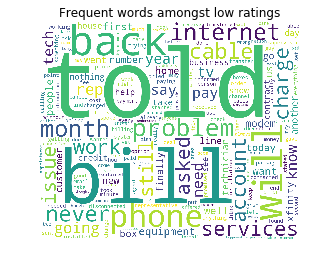

In [203]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000).generate(low_ratings)
plt.imshow(wordcloud)
plt.title('Frequent words amongst low ratings')
plt.axis('off')
plt.show()

# WordCloud of high ratings

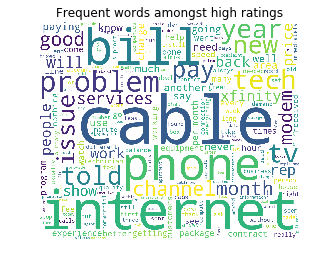

In [204]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000).generate(high_ratings)
plt.imshow(wordcloud)
plt.title('Frequent words amongst high ratings')
plt.axis('off')
plt.show()

We do not get much useful information by comparing the two wordclouds from the highest and negative ratings. Words such as 'bill', 'problem', and 'complaint' frequently appear in both of them. So, I am also setting the cuttoff for positive ratings to 4 instead of 3 may add some clarity.

# Checking the WordCloud of high ratings of customers who gave rating greater than or equal to 4

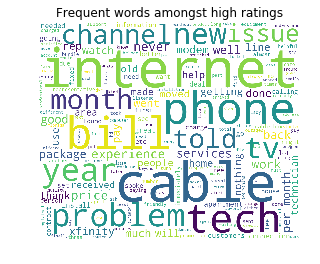

In [205]:
high_ratings =list(df['text'].dropna().loc[df['rating']>=4])
high_ratings =''.join(high_ratings).lower()

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000).generate(high_ratings)
plt.imshow(wordcloud)
plt.title('Frequent words amongst high ratings')
plt.axis('off')
plt.show()


**FCC Complaints**
------------------

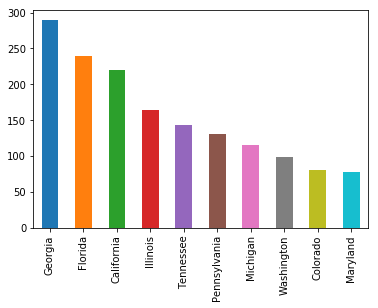

In [206]:
counts = df_fcc.State.value_counts()  #Counts according to Federal Communications Commission state wise
ax = counts.iloc[:10].plot(kind="bar") 


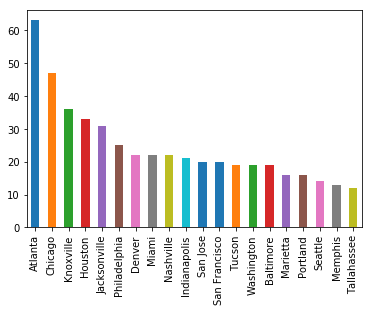

In [207]:
counts = df_fcc.City.value_counts() #Counts according to FCC city wise
ax = counts.iloc[:20].plot(kind="bar")


In [208]:
df_fcc['Customer Complaint'].value_counts() #Counting the customer complaints

Comcast                                                                            83
Comcast Internet                                                                   18
Comcast Data Cap                                                                   17
comcast                                                                            13
Data Caps                                                                          11
Comcast Data Caps                                                                  11
Comcast Billing                                                                    11
Unfair Billing Practices                                                            9
Comcast data cap                                                                    8
Internet speed                                                                      8
Comcast/Xfinity                                                                     8
Comcast internet                                      

In [209]:
from wordcloud import STOPWORDS
common_complaints = list(df_fcc['Customer Complaint'].dropna())
common_complaints =''.join(common_complaints).lower()

list_stops = ('comcast','now','company','day','someone','thing','also','got','way','call','called','one','said','tell')

for word in list_stops:
    STOPWORDS.add(word)
    
  


# WordCloud for common complaints

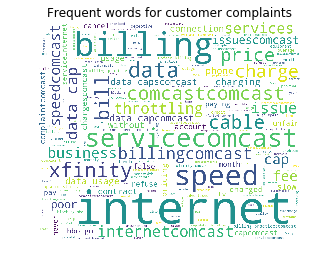

In [210]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000).generate(common_complaints)
plt.imshow(wordcloud)
plt.title('Frequent words for customer complaints')
plt.axis('off')
plt.show()

Some common issues appear to be with  customer service, billing charges/prices , internet speed, and data limits according to the fcc complaints file.  Going forward, using larger grams and using a text classifier to predict the ratings of the missing values could reveal more information. 